# 学習済みモデルの観察

In [69]:
pwd

'/workspaces/pytorch_deeplearning_programming/src/model_tuning'

In [70]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from preprocess import Preprocess

Files already downloaded and verified
Files already downloaded and verified


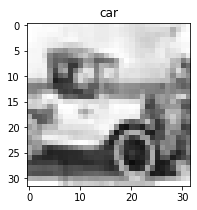

In [71]:
# hyper param
dataset_path = "./data"
model_path = "./result_Adam_with_Dropout_BatchNorm_DataAugmentation"
seed = 123
mu = 0.5
sigma = 0.5
batch_size = 100
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

preprocess = Preprocess(mu, sigma, dataset_path)
_, test_set = preprocess.prepare_dataset()
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)
preprocess.torch_seed(seed)

# get 38th image
for images, labels in test_loader:
    break
image = images[37]
label = labels[37]

# show image
plt.figure(figsize=(3, 3))
w = image.numpy().copy()
w2 = np.transpose(w, (1, 2, 0))
w3 = (w2 + 1) / 2
plt.title(classes[label])
plt.imshow(w3)
plt.show()

In [72]:
# load trained model
from collections import OrderedDict
from model import CNN_with_Dropout_BatchNorm

n_output = 10
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = CNN_with_Dropout_BatchNorm(n_output).to(device)
net.load_state_dict(torch.load(f"{model_path}/model.pth", map_location=device))
net.eval()

# get predicted value
image = image.view(1, 3, 32, 32) # print(images.shape) -> torch.Size([100, 3, 32, 32])
image = image.to(device)
output = net(image)

# show probability
probs = torch.softmax(output, dim=1)
probs_np = probs.data.to(device).numpy()[0]
values = np.frompyfunc(lambda x: f"{x:.04f}", 1, 1)(probs_np)
names = np.array(classes)
tbl = np.array([names, values]).T
print(tbl)

[['plane' '0.0000']
 ['car' '0.0377']
 ['bird' '0.0000']
 ['cat' '0.0000']
 ['deer' '0.0000']
 ['dog' '0.0000']
 ['frog' '0.0000']
 ['horse' '0.0000']
 ['ship' '0.0001']
 ['truck' '0.9623']]


トラックだと誤認識していることがわかる（第2候補が車）